#List of Libraries used for this project

In [223]:
import numpy as np
import pandas as pd
from numpy import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [224]:
!pip install scikit-multilearn

In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading Data Set 
Data Set is taken from: [US Department of Labor](https://dol.gov/agencies/eta/foreign-labor/performance)
We have combinet 2 dataset in order to increse accuracy of our model, because data in one file was bnot enough

In [226]:
# df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2008.csv", sep = ';')
# df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2009.csv", sep = ';')
# df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2010.csv", sep = ';')
# df4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2011.csv", sep = ';')
# df5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2012.csv", sep = ';')
# df6 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2013.csv", sep = ';')
# df7 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2014.csv", sep = ';')
# df8 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2015.csv", sep = ';')
df9 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2016.csv", sep = ';')
df10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2017.csv", sep = ';')
df11 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2018.csv", sep = ';')
df12 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM 2008-2019/PERM_2019.csv", sep = ';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,122) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,48,49,50,51,52,54,55,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,119,120,121,122,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [227]:
columns = [
                   "JOB_INFO_JOB_TITLE", 
                   "JOB_INFO_EDUCATION",
                   "PW_AMOUNT_9089", 
                   "PW_UNIT_OF_PAY_9089",
                   "JOB_INFO_EXPERIENCE_NUM_MONTHS", 
                   'COUNTRY_OF_CITIZENSHIP', 
                   'CLASS_OF_ADMISSION',
                   "CASE_STATUS"]

In [228]:
short_df9 = df9[columns]
short_df10 = df10[columns]
short_df11 = df11[columns]
short_df12 = df12[columns]
df = pd.concat([short_df9, short_df10, short_df11, short_df12], axis=0)
df['JOB_INFO_EXPERIENCE_NUM_MONTHS'] = df['JOB_INFO_EXPERIENCE_NUM_MONTHS'].fillna(0)
df = df.dropna()
df.shape

(412893, 8)

#Custom function to convert string columns to int 

In [229]:
def convert_to_int(a):
  if '$' in a:
    a = a.replace('$', '')
  if ' ' in a:
    a = a.replace(' ', '')
  if ',' in a:
    a = a.split(',')[0]
  if '.' in a:
    a = a.split('.')[0]
  try:
    a = int(a)
  except:
    a = None
  return a

In [230]:
df = df[df['PW_AMOUNT_9089'].notna()]
df['PW_AMOUNT_9089'] = df['PW_AMOUNT_9089'].apply(lambda x: convert_to_int(x))

In [231]:
df = df.dropna()
df.shape

(412891, 8)

#**About Dataset**
There is more that 150 columns and around 600 000 rows

After Data analysis next attributes were taken

---
#List of attributes used for the project

In [232]:
applications = df.sample(frac=1).reset_index(drop=True)
print(applications.shape)
applications.head()

(412891, 8)


JOB_INFO_JOB_TITLE  ...        CASE_STATUS
0                              Software Engineer  ...          Certified
1                                     File Clerk  ...  Certified-Expired
2                      Senior Programmer Analyst  ...  Certified-Expired
3  Member of Technical Staff (Software Engineer)  ...  Certified-Expired
4                  Software Development Engineer  ...  Certified-Expired

[5 rows x 8 columns]

#Mapping string columns to int representation

In [233]:
applications['CASE_STATUS'] = applications['CASE_STATUS'].map({'Denied': 0,  'Certified': 1, 'Withdrawn': 2, 'Certified-Expired': 3})
applications['JOB_INFO_EDUCATION'] = applications['JOB_INFO_EDUCATION'].map({"Bachelor's": 0,  "Master's": 1, 'Other': 2,"Associate's": 3,"Doctorate": 4,"High School": 5})
applications['PW_UNIT_OF_PAY_9089'] = applications['PW_UNIT_OF_PAY_9089'].map({"Year": 0,  "Hour": 1, 'Week': 2,"Bi-Weekly": 3,"Month": 4})

In [234]:
applications = applications.dropna()
applications.shape

(381184, 8)

#Drop all rows which have None attributes

In [235]:
denied = applications.loc[applications['CASE_STATUS'] == 0]
denied = denied.iloc[:12000]

certified = applications.loc[applications['CASE_STATUS'] == 1]
certified = certified.iloc[:12000]

# withdrawn = applications.loc[applications['CASE_STATUS'] == 2]
# withdrawn = withdrawn.iloc[:5000]

# certified_expired = applications.loc[applications['CASE_STATUS'] == 3]
# certified_expired = certified_expired.iloc[:5000]

result = denied.append([certified])
result = result.sample(frac=1).reset_index(drop=True)
result.shape

(24000, 8)

#Converting string values to its bit representation

In [236]:
for x in result.index:
        t = int.from_bytes(result.loc[x, 'JOB_INFO_JOB_TITLE'].encode('utf-8'), 'little')
        result.loc[x, 'JOB_INFO_JOB_TITLE'] = t
        
        t = int.from_bytes(result.loc[x, 'COUNTRY_OF_CITIZENSHIP'].encode('utf-8'), 'little')
        result.loc[x, 'COUNTRY_OF_CITIZENSHIP'] = t

        # t = int.from_bytes(result.loc[x, 'CLASS_OF_ADMISSION'].encode('utf-8'), 'little')
        # result.loc[x, 'CLASS_OF_ADMISSION'] = t
result.shape

(24000, 8)

#Deviding sample to test and train data 
Devision Rate is 60% : 40%

Also we can see number of case statuses

In [237]:
from skmultilearn.model_selection import iterative_train_test_split
x = result.iloc[:,:-2]
y = result[["CASE_STATUS"]]
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3)
print(train_labels['CASE_STATUS'].value_counts())
print(test_labels['CASE_STATUS'].value_counts())

# train_features = train.iloc[:,:-1].values
# test_features = test.iloc[:,:-1].values
# train_labels = train[["CASE_STATUS"]].values
# test_labels = test[["CASE_STATUS"]].values

0    8403
1    8397
Name: CASE_STATUS, dtype: int64
1    3603
0    3597
Name: CASE_STATUS, dtype: int64


In [238]:
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.fit_transform(test_features)

In [239]:
train_features

array([[3.83721429e-121, 2.00000000e-001, 1.24389732e-005,
        0.00000000e+000, 4.00000000e-002, 2.61153899e-059],
       [5.55977298e-191, 2.00000000e-001, 1.41749874e-002,
        0.00000000e+000, 0.00000000e+000, 3.34539547e-056],
       [2.17178632e-193, 8.00000000e-001, 1.89694342e-005,
        0.00000000e+000, 0.00000000e+000, 3.34640412e-056],
       ...,
       [3.06644655e-210, 0.00000000e+000, 1.89694342e-005,
        0.00000000e+000, 3.20000000e-001, 3.34640412e-056],
       [2.17178632e-193, 0.00000000e+000, 1.53932294e-005,
        0.00000000e+000, 0.00000000e+000, 3.34539547e-056],
       [2.11716495e-140, 0.00000000e+000, 2.53444080e-005,
        0.00000000e+000, 0.00000000e+000, 4.58062478e-056]])

In [240]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

#Creating Model 

In [311]:
model = Sequential()
model.add(Dense(20, input_dim = len(train_features[0, :]), activation = "relu"))
# model.add(Dropout(0.5))
model.add(Dense(200, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(400, activation = "relu"))
# model.add(Dense(600, activation = "relu"))
# model.add(Dropout(0.5))
model.add(Dense(2, activation = "sigmoid"))

sgd = tf.keras.optimizers.SGD(learning_rate=0.02, decay=1e-7,momentum=0.9, nesterov=True, name="SGD")
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# opt = keras.optimizers.Adam(lr=0.001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [312]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 20)                140       
                                                                 
 dense_82 (Dense)            (None, 200)               4200      
                                                                 
 dense_83 (Dense)            (None, 400)               80400     
                                                                 
 dense_84 (Dense)            (None, 600)               240600    
                                                                 
 dense_85 (Dense)            (None, 2)                 1202      
                                                                 
Total params: 326,542
Trainable params: 326,542
Non-trainable params: 0
_________________________________________________________________


In [313]:
history = model.fit(train_features, train_labels, epochs = 150, batch_size = 64)

Epoch 1/150
263/263 [==============================] - 2s 7ms/step - loss: 0.6802 - accuracy: 0.5461
Epoch 2/150
263/263 [==============================] - 2s 7ms/step - loss: 0.6710 - accuracy: 0.5676
Epoch 3/150
263/263 [==============================] - 2s 7ms/step - loss: 0.6677 - accuracy: 0.5748
Epoch 4/150
263/263 [==============================] - 2s 7ms/step - loss: 0.6648 - accuracy: 0.5718
Epoch 5/150
263/263 [==============================] - 2s 7ms/step - loss: 0.6636 - accuracy: 0.5745
Epoch 6/150
263/263 [==============================] - 2s 7ms/step - loss: 0.6622 - accuracy: 0.5770
Epoch 7/150
263/263 [==============================] - 2s 6ms/step - loss: 0.6608 - accuracy: 0.5798
Epoch 8/150
263/263 [==============================] - 2s 6ms/step - loss: 0.6607 - accuracy: 0.5743
Epoch 9/150
263/263 [==============================] - 2s 6ms/step - loss: 0.6597 - accuracy: 0.5790
Epoch 10/150
263/263 [==============================] - 2s 6ms/step - loss: 0.6591 - accura

In [314]:
score = model.evaluate(test_features, test_labels, batch_size = 64)

113/113 [==============================] - 1s 3ms/step - loss: 0.6641 - accuracy: 0.5785


In [315]:
score

[0.664118766784668, 0.5784721970558167]

In [316]:
preds = model.predict(test_features, batch_size=None, verbose=0, steps = None)

In [317]:
test_prediction_label = np.argmax(preds.T, axis = 0)

In [318]:
pred_test_labels = []
for row in test_prediction_label:
        pred_test_labels.append(row)
pd.DataFrame(pred_test_labels)

0
0     0
1     1
2     1
3     0
4     0
...  ..
7195  0
7196  0
7197  1
7198  1
7199  0

[7200 rows x 1 columns]

In [319]:
from sklearn.metrics import classification_report
print("Classification Report for Test Data\n")
print(classification_report(test_prediction_label, test_labels))

Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.62      0.57      0.59      3872
           1       0.54      0.59      0.56      3328

    accuracy                           0.58      7200
   macro avg       0.58      0.58      0.58      7200
weighted avg       0.58      0.58      0.58      7200



dict_keys(['loss', 'accuracy'])


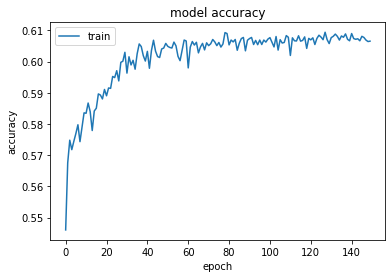

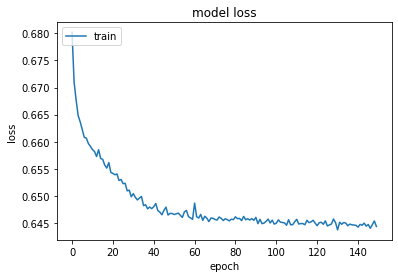

In [320]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()